In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12.0, 8.0
import numpy as np
from scipy.stats import norm
	
n_samples = 10
n_features = 4096
n_classes = 2
	
delta = 0.5
dt = 1
x = 0.
	
X = np.zeros((n_samples, n_features))
X[:, 0] = x
	
for i in range(n_samples):
    start = x
    for k in range(1, n_features):
        start += norm.rvs(scale=delta**2 * dt)
        X[i][k] = start
	
y = np.random.randint(n_classes, size=n_samples)

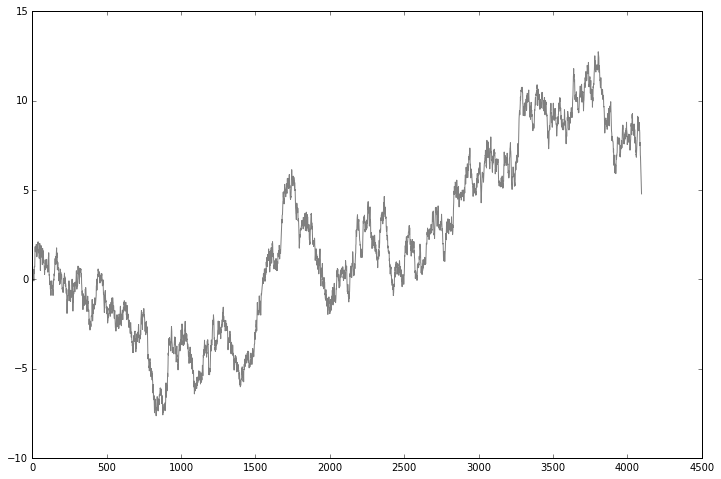

In [2]:
from pyts.visualization import plot_ts

plot_ts(X[0])
plt.show()

In [3]:
from pyts.transformation import StandardScaler

standardscaler = StandardScaler(epsilon=1e-2)
X_standardized = standardscaler.transform(X)

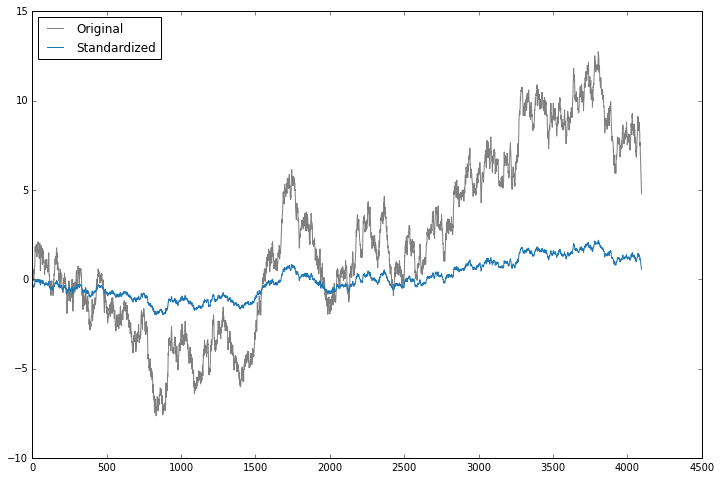

In [4]:
from pyts.visualization import plot_standardscaler

plot_standardscaler(X[0])
plt.show()

In [5]:
from pyts.transformation import PAA

paa = PAA(window_size=None, output_size=8, overlapping=True)
X_paa = paa.transform(X_standardized)

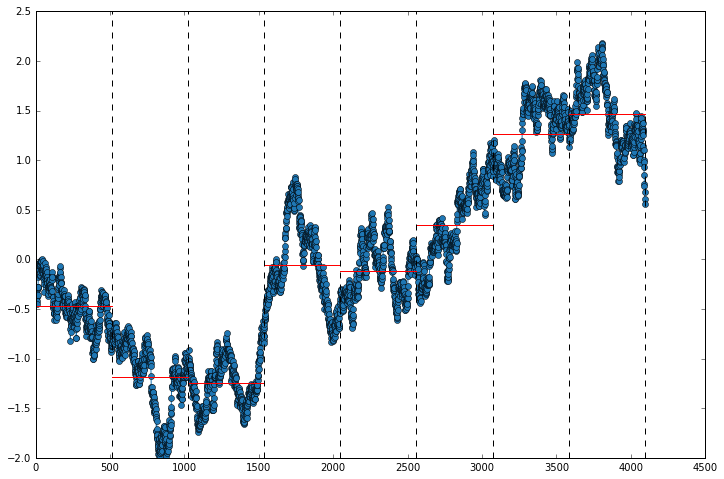

In [6]:
from pyts.visualization import plot_paa

plot_paa(X_standardized[0], window_size=None, output_size=8, overlapping=True, marker='o')
plt.show()

In [7]:
from pyts.transformation import SAX

sax = SAX(n_bins=5, quantiles='gaussian')
X_sax = sax.transform(X_paa)

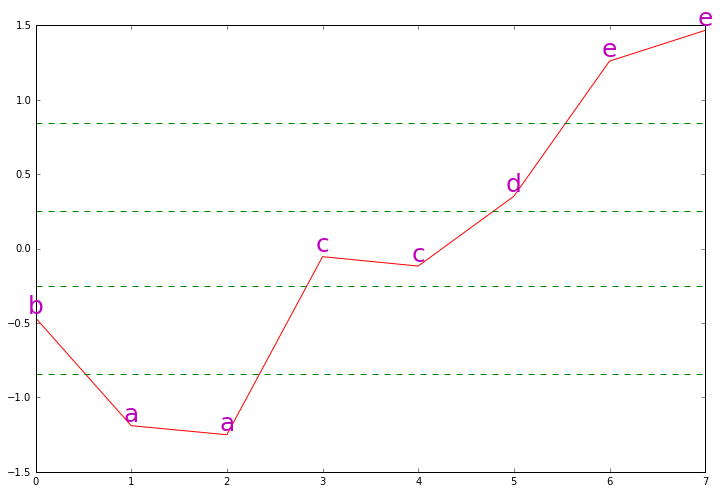

In [8]:
from pyts.visualization import plot_sax

plot_sax(X_paa[0], n_bins=5, quantiles='gaussian')
plt.show()

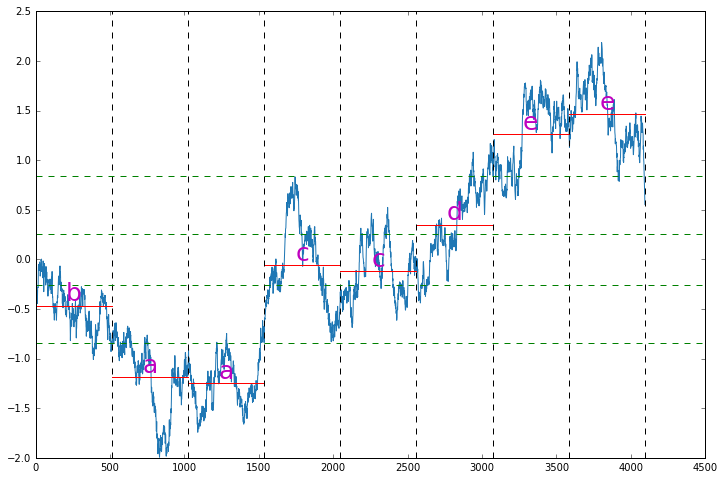

In [9]:
from pyts.visualization import plot_paa_sax

plot_paa_sax(X_standardized[0], window_size=None, output_size=8, overlapping=True, n_bins=5, quantiles='gaussian')
plt.show()

In [10]:
from pyts.transformation import VSM

vsm = VSM(window_size=4, numerosity_reduction=True)
X_vsm = vsm.transform(X_sax)

In [11]:
from pyts.transformation import GASF, GADF

gasf = GASF(image_size=24, overlapping=False, scale='-1')
X_gasf = gasf.transform(X_standardized)

gadf = GADF(image_size=24, overlapping=False, scale='-1')
X_gadf = gadf.transform(X_standardized)

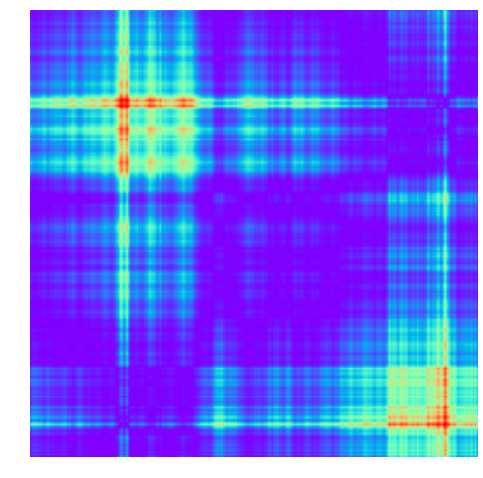

In [24]:
from pyts.visualization import plot_gasf

plot_gasf(X_standardized[0], image_size=256, overlapping=False, scale='-1')
plt.show()

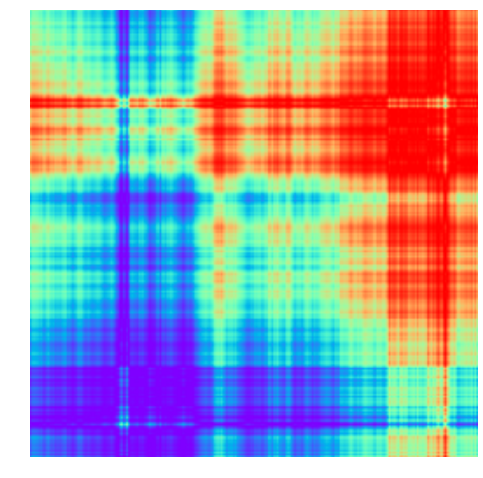

In [25]:
from pyts.visualization import plot_gadf

plot_gadf(X_standardized[0], image_size=256, overlapping=False, scale='-1')
plt.show()

In [26]:
from pyts.transformation import MTF

mtf = MTF(image_size=256, n_bins=4, quantiles='empirical', overlapping=False)
X_mtf = mtf.transform(X_standardized)

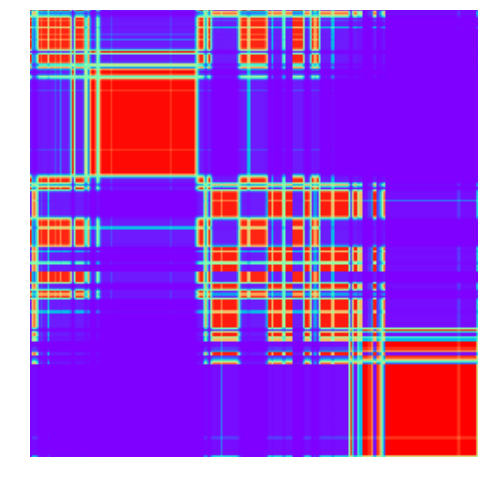

In [27]:
from pyts.visualization import plot_mtf

plot_mtf(X_standardized[0], image_size=256, n_bins=4, quantiles='empirical', overlapping=False)
plt.show()

In [28]:
from pyts.transformation import RecurrencePlots

rp = RecurrencePlots(dimension=3, epsilon='percentage_points', percentage=10)
X_rp = rp.transform(X_standardized)

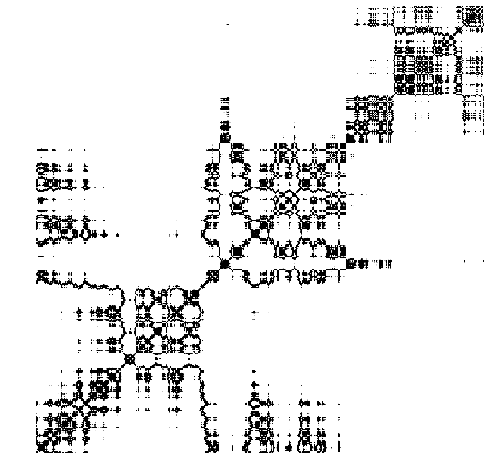

In [29]:
from pyts.visualization import plot_recurrence_plots

plot_recurrence_plots(X_standardized[0], dimension=3, epsilon='percentage_points', percentage=10)
plt.show()

In [18]:
from pyts.classification import SAXVSMClassifier

clf = SAXVSMClassifier()
clf.fit(X_vsm[:80], y[:80])
y_pred = clf.predict(X_vsm[80:])
clf.score(X_vsm[80:], y[80:])

ValueError: Found array with 0 sample(s) (shape=(0, 38)) while a minimum of 1 is required by check_pairwise_arrays.

In [ ]:
from pyts.classifier import KNNClassifier

clf = KNNClassifier(metric='minkowski', p=2)
clf.fit(X_standardized[:80], y[:80])
y_pred = clf.predict(X_standardized[80:])
clf.score(X_standardized[80:], y[80:])

In [ ]:
clf.set_params(metric='fast_dtw', metric_params={"approximation": True, "window_size": 8})
clf.fit(X_standardized[:80], y[:80])
y_pred = clf.predict(X_standardized[80:])
clf.score(X_standardized[80:], y[80:])

In [ ]:
from pyts.visualization import plot_dtw

plot_dtw(X[0], X[1])
plt.show()

In [ ]:
from pyts.visualization import plot_fastdtw

plot_fastdtw(X[0], X[1], window_size=12)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("sc", StandardScaler()),
                     ("paa", PAA(output_size=12, overlapping=True)),
                     ("sax", SAX(n_bins=5, quantiles='gaussian')),
                     ("vsm", VSM(window_size=4, numerosity_reduction=True)),
                     ("clf", SAXVSMClassifier())
                    ])

pipeline.fit(X[:80], y[:80])
y_pred = pipeline.predict(X[80:])
pipeline.score(X[80:], y[80:])

In [ ]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([("sc", StandardScaler()),
                     ("paa", PAA(output_size=13)),
                     ("sax", SAX(n_bins=5, quantiles='gaussian')),
                     ("vsm", VSM(numerosity_reduction=True)),
                     ("clf", SAXVSMClassifier())
                    ])
                    
parameters = {"paa__overlapping": [True, False], "vsm__window_size": [3, 4, 5]}

clf = GridSearchCV(pipeline, parameters)
clf.fit(X[:80], y[:80])
y_pred = clf.predict(X[80:])
clf.score(X[80:], y[80:])